In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model, tree, ensemble, svm
import xgboost

In [47]:
data = pd.read_csv(r'D:/Traffic_Volume_Project/traffic volume.csv')

In [48]:
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [49]:
data.describe()

,temp,rain,snow,traffic_volume
count,48151.000000,48202.000000,48192.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.343675,44.790062,0.008169,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [51]:
data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [67]:
data['holiday'].fillna('None', inplace=True)
data['temp'].fillna(data['temp'].mean(), inplace=True)
data['rain'].fillna(data['rain'].mean(), inplace=True)
data['snow'].fillna(data['snow'].mean(), inplace=True)
data.drop(columns=['date', 'Time'], inplace=True, errors='ignore')

C:\Users\PUDURU DEEPIKA\AppData\Local\Temp\ipykernel_11540\3819064642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['holiday'].fillna('None', inplace=True)
C:\Users\PUDURU DEEPIKA\AppData\Local\Temp\ipykernel_11540\3819064642.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [68]:
from collections import Counter
print(Counter(data['weather']))

Counter({'Clouds': 15193, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, 'Smoke': 20, 'Squall': 4})


In [69]:
data['weather'].fillna('Clouds',inplace=True)

C:\Users\PUDURU DEEPIKA\AppData\Local\Temp\ipykernel_11540\1731991201.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weather'].fillna('Clouds',inplace=True)


In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['holiday'] = le.fit_transform(data['holiday'])
data['weather'] = le.fit_transform(data['weather'])
cor = data.corr(numeric_only=True)
print(cor)


                 holiday      temp      rain      snow   weather  \
holiday         1.000000 -0.000472  0.000066  0.000432 -0.004328   
temp           -0.000472  1.000000  0.009070 -0.019758 -0.033559   
rain            0.000066  0.009070  1.000000 -0.000090  0.009542   
snow            0.000432 -0.019758 -0.000090  1.000000  0.036662   
weather        -0.004328 -0.033559  0.009542  0.036662  1.000000   
traffic_volume  0.018676  0.130034  0.004714  0.000735 -0.040035   

                traffic_volume  
holiday               0.018676  
temp                  0.130034  
rain                  0.004714  
snow                  0.000735  
weather              -0.040035  
traffic_volume        1.000000  


<Axes: >

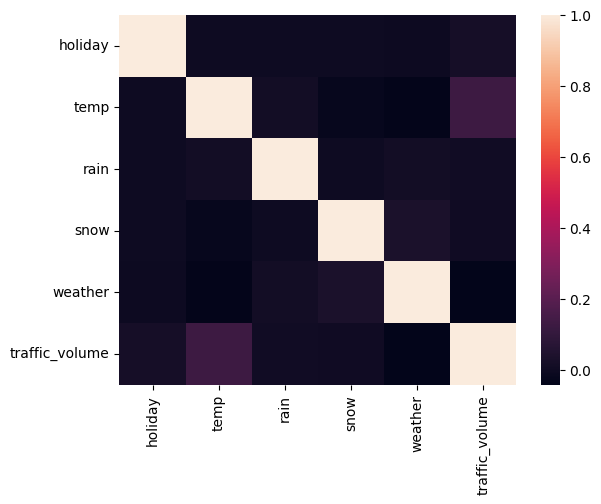

In [71]:
sns.heatmap(cor)

In [72]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume'], axis=1)

In [73]:
names=x.columns

In [74]:
from sklearn.preprocessing import scale

In [75]:
x_scaled = scale(x)
x = pd.DataFrame(x_scaled, columns=x.columns)

In [65]:
x.head()

,holiday,temp,rain,snow,weather,date,Time
0,0.015856,0.530485,-0.007463,-0.027235,NaN,NaN,NaN
1,0.015856,0.611467,-0.007463,-0.027235,NaN,NaN,NaN
2,0.015856,0.627964,-0.007463,-0.027235,NaN,NaN,NaN
3,0.015856,0.669205,-0.007463,-0.027235,NaN,NaN,NaN
4,0.015856,0.744939,-0.007463,-0.027235,NaN,NaN,NaN


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
from sklearn import linear_model
from sklearn import tree, ensemble, svm
import xgboost

In [80]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [81]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:

p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [84]:
from sklearn import metrics

print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))


-52.476250910659
0.18862001500271974
-0.2681074794361862
-58.74827936684949
-7.781118392944336


In [85]:
p1 = lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p4=svr.predict(x_test)
p5=XGB.predict(x_test)

In [86]:
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p4,y_test))
print(metrics.r2_score(p5,y_test))


-50.997939785998966
-1.2576618512054347
-2.074245261362066
-57.38156919022512
-8.731637001037598


In [87]:
MSE = metrics.mean_squared_error(p3,y_test)
np.sqrt(MSE)

2141.286572537879

In [88]:
import pickle

In [ ]:
pickle.dump(Rand, open("model.pkl","wb"))
pickle.dump(le, open("encoder.pkl","wb"))


In [92]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    print(model)


RandomForestRegressor()


In [93]:
# Assuming 'model' is your trained RandomForestRegressor
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [94]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    print(model)


RandomForestRegressor()


In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

with open('scale.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [97]:
scale = pickle.load(open('scale.pkl', 'rb'))


In [103]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
X, y = make_regression(n_samples=100, n_features=12, noise=0.2, random_state=42)

# Step 2: Train model
model = RandomForestRegressor()
model.fit(X, y)

# Step 3: Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ model.pkl created successfully")

✅ model.pkl created successfully


In [104]:

# Load the model
model = pickle.load(open('model.pkl', 'rb'))


In [105]:

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

print(model)


RandomForestRegressor()


In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

with open('scale.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

# X = input features, y = target (traffic_volume)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor()
model.fit(X_scaled, y)

# Save both
joblib.dump(model, 'model.pkl')



['model.pkl']

In [110]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [111]:
scaler.fit(X)  # or StandardScaler().fit(X)


StandardScaler()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset
data = pd.read_csv(r'D:/Traffic_Volume_Project/traffic volume.csv')  # Replace with your actual file path
data.columns = data.columns.str.strip()  # Clean up column names

# ✅ Convert date_time column
data.loc[:, 'date_time'] = pd.to_datetime(data['date_time'])

# ✅ Extract time features
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['hours'] = data['date_time'].dt.hour
data['minutes'] = data['date_time'].dt.minute
data['seconds'] = data['date_time'].dt.second

# ✅ Define the full list of features
features = ['holiday', 'temp', 'rain', 'snow', 'weather',
            'year', 'month', 'day', 'hours', 'minutes', 'seconds']

# ✅ Encode 'weather' if it's string-based
if data['weather'].dtype == 'object':
    data['weather'] = data['weather'].astype('category').cat.codes

# ✅ Prepare feature matrix and target
X = data[features]
y = data['traffic_volume']

# ✅ Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Train/test split (optional)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ✅ Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ✅ Save model and scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scale.pkl')


KeyError: 'date_time'

In [132]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
le_holiday = LabelEncoder()
le_weather = LabelEncoder()

data['holiday'] = le_holiday.fit_transform(data['holiday'])
data['weather'] = le_weather.fit_transform(data['weather'])

# Define features and target
features = ['holiday', 'temp', 'rain', 'snow', 'weather', 'year', 'month', 'day', 'hours', 'minutes', 'seconds']
X = data[features]
y = data['traffic_volume']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_scaled, y)

# Save model and scaler
joblib.dump(model, 'model.pkl')
# joblib.dump(scaler, 'scale.pkl')


['model.pkl']